In [34]:
import numpy as np
from simplex import simplex, two_phases, dual_simplex, build_tableau, optimal_solution, correct_all_tableau, basic2vertex
np.set_printoptions(suppress=True, linewidth=np.nan)

## Linear and Integer Optimization: Chapter 4

#### Exercise 4.8.1

In [35]:
A = np.array([[1, -3, 0, 1, 0, 0],
              [3, 1, 2., 0, 1, 0],
              [1, 2, 1., 0, 0, 1]])

b = np.array([7, 6, 5])

c = np.array([1, 2, -3, 0, 0, 0])

basic_var = [3, 4, 5]
tableau = build_tableau(A, b, c)
simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)


vertex = [0. 0. 0.], x_B = [4, 5, 6]
[[ 1.  2. -3.  0.  0.  0.  0.]
 [ 1. -3.  0.  1.  0.  0.  7.]
 [ 3.  1.  2.  0.  1.  0.  6.]
 [ 1.  2.  1.  0.  0.  1.  5.]]
vertex = [0.  2.5 0. ], x_B = [4, 5, 2]
[[ 0.   0.  -4.   0.   0.  -1.  -5. ]
 [ 2.5  0.   1.5  1.   0.   1.5 14.5]
 [ 2.5  0.   1.5  0.   1.  -0.5  3.5]
 [ 0.5  1.   0.5  0.   0.   0.5  2.5]]
Optimal solution: x_opt = [0.  2.5 0. ]


In [36]:
y_sol = np.linalg.inv(A[:, [3, 4, 1]]).T @ c[[3, 4, 1]]
y_sol

array([0., 0., 1.])

The simplex algorithm from the dual perspective

In [37]:
A_T = [[1, 3, 1, -1, 0, 0],
     [-3, 1, 2., 0, -1, 0], 
     [0, 2, 1., 0, 0, -1]]

c = [1, 2, -3]

b = [-7, -6, -5, 0, 0, 0]

basic_var = [0, 2, 5]

tableau = build_tableau(A_T, c, b)
correct_all_tableau(tableau, basic_var)
simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)

All tableau corrected
vertex = [0. 0. 1.], x_B = [1, 3, 6]
[[ 0.  11.   0.  -5.8  0.4  0.   5. ]
 [ 1.   1.   0.  -0.4  0.2  0.   0. ]
 [ 0.   2.   1.  -0.6 -0.2  0.   1. ]
 [-0.  -0.  -0.  -0.6 -0.2  1.   4. ]]
vertex = [0. 0. 1.], x_B = [2, 3, 6]
[[-11.    0.    0.   -1.4  -1.8   0.    5. ]
 [  1.    1.    0.   -0.4   0.2   0.    0. ]
 [ -2.    0.    1.    0.2  -0.6   0.    1. ]
 [ -0.   -0.   -0.   -0.6  -0.2   1.    4. ]]
Optimal solution: x_opt = [0. 0. 1.]


In [38]:
A = np.array([[2, -1, -1, 0, 0, 1],
              [-1, 1, 0., 1, 0, 0],
              [3, -2, 0, 0, 1, 0]])
b = np.array([4, 3, 10])
c_temp = [0, 0., 0, 0, 0, -1]
tableau = build_tableau(A, b, c_temp)

c = np.array([3, -5., 0, 0, 0, 0])

basic_var = [5, 3, 4]
artificial_var = [5]

tableau = two_phases(tableau, c, basic_var, artificial_var)
optimal_solution(tableau, basic_var)


x_B = [6, 4, 5]
[[ 0.  0.  0.  0.  0. -1.  0.]
 [ 2. -1. -1.  0.  0.  1.  4.]
 [-1.  1.  0.  1.  0.  0.  3.]
 [ 3. -2.  0.  0.  1.  0. 10.]]
Cost corrected
x_B = [6, 4, 5]
[[ 2. -1. -1.  0.  0.  0.  4.]
 [ 2. -1. -1.  0.  0.  1.  4.]
 [-1.  1.  0.  1.  0.  0.  3.]
 [ 3. -2.  0.  0.  1.  0. 10.]]
Start phase One
x_B = [1, 4, 5]
[[ 0.   0.   0.   0.   0.  -1.   0. ]
 [ 1.  -0.5 -0.5  0.   0.   0.5  2. ]
 [ 0.   0.5 -0.5  1.   0.   0.5  5. ]
 [ 0.  -0.5  1.5  0.   1.  -1.5  4. ]]
Delete artificial variables and create a new tableau [5]
Start phase two, put original cost
x_B = [1, 4, 5]
[[ 3.  -5.   0.   0.   0.   0. ]
 [ 1.  -0.5 -0.5  0.   0.   2. ]
 [ 0.   0.5 -0.5  1.   0.   5. ]
 [ 0.  -0.5  1.5  0.   1.   4. ]]
Cost corrected
vertex = [2. 0.], x_B = [1, 4, 5]
[[ 0.  -3.5  1.5  0.   0.  -6. ]
 [ 1.  -0.5 -0.5  0.   0.   2. ]
 [ 0.   0.5 -0.5  1.   0.   5. ]
 [ 0.  -0.5  1.5  0.   1.   4. ]]
vertex = [3.33333333 0.        ], x_B = [1, 4, 3]
[[  0.          -3.           0.           0.

In [39]:
y_sol = np.linalg.inv(A[:, basic_var]).T @ c[basic_var]
y_sol

array([0., 0., 1.])

Dual mode

In [40]:
A_T = np.array([[-2, -1, 3, -1, 0],
                [1., 1, -2, 0, -1]])

b = np.array([4, -3, -10, 0, 0.0])

c = np.array([3, -5.0])

tableau = build_tableau(A_T, c, b)
basic_var = [0, 2]
correct_all_tableau(tableau, basic_var)

simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)


All tableau corrected
vertex = [9. 0. 7.], x_B = [1, 3]
[[ 0. -9.  0.  2.  8. 34.]
 [ 1. -1.  0.  2.  3.  9.]
 [-0. -1.  1.  1.  2.  7.]]
vertex = [0. 0. 1.], x_B = [5, 3]
[[-2.66666667 -6.33333333  0.         -3.33333333  0.         10.        ]
 [ 0.33333333 -0.33333333  0.          0.66666667  1.          3.        ]
 [-0.66666667 -0.33333333  1.         -0.33333333  0.          1.        ]]
Optimal solution: x_opt = [0. 0. 1.]


#### Exercise 4.8.3
Consider the following LO-model.
\begin{align*}
\max 2x_1& +& 4x_2& +& 10x_3& +& 15x_4&\\ 
s.t. -x_1& +& x_2& +& x_3& +& 3x_4& \ge 1\\
      x_1& -& x_2& +& 2x_3& +& x_4& \ge 1\\
\end{align*}
$$x_1, x_2, x_3, x_4\ge0$$

a) Solve the model by solving its dual model (using the graphical solution method). 

In [41]:
# solve with primal mode
A = np.array([[-1, 1, 1, 0, 0, 0],
              [1, -1, 0, 1, 0, 0],
              [1, 2., 0, 0, 1, 0],
              [3, 1., 0, 0, 0, 1]])

b = [2, 4, 10, 15.0]

c = np.array([1, 1, 0, 0, 0, 0.])

basic_var = [2, 3, 4, 5]

tableau = build_tableau(A, b, c)
simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)


vertex = [0. 0.], x_B = [3, 4, 5, 6]
[[ 1.  1.  0.  0.  0.  0.  0.]
 [-1.  1.  1.  0.  0.  0.  2.]
 [ 1. -1.  0.  1.  0.  0.  4.]
 [ 1.  2.  0.  0.  1.  0. 10.]
 [ 3.  1.  0.  0.  0.  1. 15.]]
vertex = [4. 0.], x_B = [3, 1, 5, 6]
[[ 0.  2.  0. -1.  0.  0. -4.]
 [ 0.  0.  1.  1.  0.  0.  6.]
 [ 1. -1.  0.  1.  0.  0.  4.]
 [ 0.  3.  0. -1.  1.  0.  6.]
 [ 0.  4.  0. -3.  0.  1.  3.]]
vertex = [4.75 0.75], x_B = [3, 1, 5, 2]
[[ 0.    0.    0.    0.5   0.   -0.5  -5.5 ]
 [ 0.    0.    1.    1.    0.    0.    6.  ]
 [ 1.    0.    0.    0.25  0.    0.25  4.75]
 [ 0.    0.    0.    1.25  1.   -0.75  3.75]
 [ 0.    1.    0.   -0.75  0.    0.25  0.75]]
vertex = [4. 3.], x_B = [3, 1, 4, 2]
[[ 0.   0.   0.   0.  -0.4 -0.2 -7. ]
 [ 0.   0.   1.   0.  -0.8  0.6  3. ]
 [ 1.   0.   0.   0.  -0.2  0.4  4. ]
 [ 0.   0.   0.   1.   0.8 -0.6  3. ]
 [ 0.   1.   0.   0.   0.6 -0.2  3. ]]
Optimal solution: x_opt = [4. 3.]


In [42]:
# solve with B^{-1}^Tc_{BI}
y_sol = np.linalg.inv(A[:, basic_var]).T @ c[basic_var]
y_sol

array([0. , 0. , 0.4, 0.2])

In [43]:
# solve with dual mode
A_T = np.array([[-1, 1, 1, 3, -1, 0.],
                [1, -1, 2, 1, 0, -1.]])

c = [1, 1.]

# -max<-b^T, y> = min<b^T, y>
b = np.array([-2, -4, -10, -15, 0., 0])

basic_var = [0, 3]

tableau = build_tableau(A_T, c, b)
print(tableau)
correct_all_tableau(tableau, basic_var)
simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)


[[ -2.  -4. -10. -15.   0.   0.   0.]
 [ -1.   1.   1.   3.  -1.   0.   1.]
 [  1.  -1.   2.   1.   0.  -1.   1.]]
All tableau corrected
vertex = [0.5 0.  0.  0.5], x_B = [1, 4]
[[ 0.   -6.    3.75  0.   -3.25 -5.25  8.5 ]
 [ 1.   -1.    1.25  0.    0.25 -0.75  0.5 ]
 [ 0.    0.    0.75  1.   -0.25 -0.25  0.5 ]]
vertex = [0.  0.  0.4 0.2], x_B = [3, 4]
[[-3.  -3.   0.   0.  -4.  -3.   7. ]
 [ 0.8 -0.8  1.   0.   0.2 -0.6  0.4]
 [-0.6  0.6  0.   1.  -0.4  0.2  0.2]]
Optimal solution: x_opt = [0.  0.  0.4 0.2]


In [44]:
# solve with compl(B)^{-1}^Tc_{compl(BI)}
x_sol = np.linalg.inv(A_T[:, basic_var]).T @ b[basic_var]
-x_sol

array([4., 3.])

#### Exercise 4.8.16
$$
\begin{align*}
\max 2x_1& - x_2&\\
s.t.\quad x_1& + x_2& \le 4\\
     x_1& - x_2& \le 2\\
     -x_1& + x_2& \le 2\\
\end{align*}
$$
$$x_1, x_2 \ge 0$$


In [45]:
A = [[1, 1., 1, 0, 0],
     [1, -1, 0, 1, 0],
     [-1, 1, 0, 0, 1]]

b = [4, 2, 2.]

c = [2, -1, 0, 0, 0.]

basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c)
simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)

vertex = [0. 0.], x_B = [3, 4, 5]
[[ 2. -1.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  4.]
 [ 1. -1.  0.  1.  0.  2.]
 [-1.  1.  0.  0.  1.  2.]]
vertex = [2. 0.], x_B = [3, 1, 5]
[[ 0.  1.  0. -2.  0. -4.]
 [ 0.  2.  1. -1.  0.  2.]
 [ 1. -1.  0.  1.  0.  2.]
 [ 0.  0.  0.  1.  1.  4.]]
vertex = [3. 1.], x_B = [2, 1, 5]
[[ 0.   0.  -0.5 -1.5  0.  -5. ]
 [ 0.   1.   0.5 -0.5  0.   1. ]
 [ 1.   0.   0.5  0.5  0.   3. ]
 [ 0.   0.   0.   1.   1.   4. ]]
Optimal solution: x_opt = [3. 1.]


Adding the constraint $x_1 \le 1$

In [46]:
optimal_tableau = np.array([[0., 0., -0.5, -1.5, 0., 0, -5.],
                            [0., 1., 0.5, -0.5, 0.0, 0, 1.0],
                            [1., 0., 0.5, 0.5, 0.0, 0., 3.0],
                            [0., 0., 0.0, 1.0, 1.0, 0., 4.0],
                            [1., 0., 0.0, 0.0, 0.0, 1., 1.0]])
basic_var = [1, 0, 4, 5]
print(f"x_B = {basic_var}\n{optimal_tableau}")
correct_all_tableau(optimal_tableau, basic_var)
dual_simplex(optimal_tableau, basic_var)


x_B = [1, 0, 4, 5]
[[ 0.   0.  -0.5 -1.5  0.   0.  -5. ]
 [ 0.   1.   0.5 -0.5  0.   0.   1. ]
 [ 1.   0.   0.5  0.5  0.   0.   3. ]
 [ 0.   0.   0.   1.   1.   0.   4. ]
 [ 1.   0.   0.   0.   0.   1.   1. ]]
All tableau corrected
vertex = [3. 1.], x_B = [2, 1, 5, 6]
[[ 0.   0.  -0.5 -1.5  0.   0.  -5. ]
 [ 0.   1.   0.5 -0.5  0.   0.   1. ]
 [ 1.   0.   0.5  0.5  0.   0.   3. ]
 [ 0.   0.   0.   1.   1.   0.   4. ]
 [ 0.   0.  -0.5 -0.5  0.   1.  -2. ]]
vertex = [ 1. -1.], x_B = [2, 1, 5, 3]
[[ 0.  0.  0. -1.  0. -1. -3.]
 [ 0.  1.  0. -1.  0.  1. -1.]
 [ 1.  0.  0.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.  0.  4.]
 [-0. -0.  1.  1. -0. -2.  4.]]
vertex = [1. 0.], x_B = [4, 1, 5, 3]
[[ 0. -1.  0.  0.  0. -2. -2.]
 [-0. -1. -0.  1. -0. -1.  1.]
 [ 1.  0.  0.  0.  0.  1.  1.]
 [ 0.  1.  0.  0.  1.  1.  3.]
 [ 0.  1.  1.  0.  0. -1.  3.]]


## Práctica Dirigida 5

#### Problema 7
a) Resolver el LO, mediante el algoritmo simplex.

In [47]:
A = np.array([[1., 1, 1, 1, 0., 0],
              [-1, 2, 0, 0, -1, 0],
              [1., 0, 0, 0, 0., 1]])

b = np.array([3, 2, 1.])

c = np.array([1, 2, 1, 0, 0.0, 0.0])

tableau = build_tableau(A, b, c)
basic_var = [3, 1, 5]
correct_all_tableau(tableau, basic_var)
print(tableau)
simplex(tableau, basic_var);
optimal_solution(tableau, basic_var)

All tableau corrected
[[ 2.   0.   1.   0.   1.   0.  -2. ]
 [ 1.5  0.   1.   1.   0.5  0.   2. ]
 [-0.5  1.   0.   0.  -0.5  0.   1. ]
 [ 1.   0.   0.   0.   0.   1.   1. ]]
vertex = [0. 1. 0.], x_B = [4, 2, 6]
[[ 2.   0.   1.   0.   1.   0.  -2. ]
 [ 1.5  0.   1.   1.   0.5  0.   2. ]
 [-0.5  1.   0.   0.  -0.5  0.   1. ]
 [ 1.   0.   0.   0.   0.   1.   1. ]]
vertex = [1.  1.5 0. ], x_B = [4, 2, 1]
[[ 0.   0.   1.   0.   1.  -2.  -4. ]
 [ 0.   0.   1.   1.   0.5 -1.5  0.5]
 [ 0.   1.   0.   0.  -0.5  0.5  1.5]
 [ 1.   0.   0.   0.   0.   1.   1. ]]
vertex = [1.  1.5 0.5], x_B = [3, 2, 1]
[[ 0.   0.   0.  -1.   0.5 -0.5 -4.5]
 [ 0.   0.   1.   1.   0.5 -1.5  0.5]
 [ 0.   1.   0.   0.  -0.5  0.5  1.5]
 [ 1.   0.   0.   0.   0.   1.   1. ]]
vertex = [1. 2. 0.], x_B = [5, 2, 1]
[[ 0.  0. -1. -2.  0.  1. -5.]
 [ 0.  0.  2.  2.  1. -3.  1.]
 [ 0.  1.  1.  1.  0. -1.  2.]
 [ 1.  0.  0.  0.  0.  1.  1.]]
vertex = [0. 3. 0.], x_B = [5, 2, 6]
[[-1.  0. -1. -2.  0.  0. -6.]
 [ 3.  0.  2.  2.  

## Práctica Calificada 4

#### Problema 1

In [48]:
A = [[1, 2, 1, 0, 0],
     [2, -1, 0, 1, 0],
     [-0.5, 1, 0, 0, 1]]

b = [8, 4, 2.]

c = [1, 3, 0, 0, 0.]

basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c)
simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)

vertex = [0. 0.], x_B = [3, 4, 5]
[[ 1.   3.   0.   0.   0.   0. ]
 [ 1.   2.   1.   0.   0.   8. ]
 [ 2.  -1.   0.   1.   0.   4. ]
 [-0.5  1.   0.   0.   1.   2. ]]
vertex = [0. 2.], x_B = [3, 4, 2]
[[ 2.5  0.   0.   0.  -3.  -6. ]
 [ 2.   0.   1.   0.  -2.   4. ]
 [ 1.5  0.   0.   1.   1.   6. ]
 [-0.5  1.   0.   0.   1.   2. ]]
vertex = [2. 3.], x_B = [1, 4, 2]
[[  0.     0.    -1.25   0.    -0.5  -11.  ]
 [  1.     0.     0.5    0.    -1.     2.  ]
 [  0.     0.    -0.75   1.     2.5    3.  ]
 [  0.     1.     0.25   0.     0.5    3.  ]]
Optimal solution: x_opt = [2. 3.]


In [49]:
A_T = [[1, 2, -0.5, -1, 0.],
       [2, -1, 1.0, 0., -1]]

c = [1, 3.]

b = [-8, -4, -2, 0, 0.]

tableau = build_tableau(A_T, c, b)
basic_var = [0, 2]
correct_all_tableau(tableau, basic_var)

simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)

All tableau corrected
vertex = [1.25 0.   0.5 ], x_B = [1, 3]
[[ 0.   -3.    0.   -2.   -3.   11.  ]
 [ 1.    0.75  0.   -0.5  -0.25  1.25]
 [ 0.   -2.5   1.    1.   -0.5   0.5 ]]
Optimal solution: x_opt = [1.25 0.   0.5 ]


## Práctica Dirigida 6

#### 1. Dado el siguiente LO

\begin{align*}
\max -x_1& - x_2& - x_3&\\
s.t.\quad  -x_1& - x_2& - x_3& \le -3\\
           -4x_1& - x_2& - 2x_3& \le -5\\
\end{align*}
$$x_1, x_2,x_3\ge 0 $$


In [57]:
# PC4 1
# dual 
A_T = np.array([[1, 2., 3, 1, 0., 0],
                [1, -3, -1, 0, 1, 0],
                [-4, 1, 1., 0, 0, 1]])
c = np.array([6, 3, -3])
b = np.array([-1, -2, -2, 0., 0., 0])

basic_var = [3, 4, 5]

tableau = build_tableau(A_T, c, b)
dual_simplex(tableau, basic_var)
basic2vertex(tableau, basic_var, False)


vertex = [0. 0. 0.], x_B = [4, 5, 6]
[[-1. -2. -2.  0.  0.  0.  0.]
 [ 1.  2.  3.  1.  0.  0.  6.]
 [ 1. -3. -1.  0.  1.  0.  3.]
 [-4.  1.  1.  0.  0.  1. -3.]]
vertex = [0.75 0.   0.  ], x_B = [4, 5, 1]
[[ 0.   -2.25 -2.25  0.    0.   -0.25  0.75]
 [ 0.    2.25  3.25  1.    0.    0.25  5.25]
 [ 0.   -2.75 -0.75  0.    1.    0.25  2.25]
 [ 1.   -0.25 -0.25 -0.   -0.   -0.25  0.75]]


array([0.75, 0.  , 0.  , 5.25, 2.25, 0.  ])

In [69]:
# reoptimizando
tableau = np.array([[0., -2.25, -2.25, 0., 0., -0.25, 0, 0, 0.75],
                    [0., 2.25, 3.25, 1., 0., 0.25, 0, 0, 5.25],
                    [0., -2.75, -0.75, 0., 1., 0.25, 0, 0, 2.25],
                    [1., -0.25, -0.25, -0., -0., -0.25, 0, 0, 0.75],
                    [-3, -2, 1, 0, 0, 0, 1, 0, -6],
                    [3, 2, -1, 0, 0, 0, 0, 1, 6]])

basic_var = [3, 4, 0, 6, 7]
print(tableau)
correct_all_tableau(tableau, basic_var)
print(tableau)
dual_simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)
basic2vertex(tableau, basic_var, False)

[[ 0.   -2.25 -2.25  0.    0.   -0.25  0.    0.    0.75]
 [ 0.    2.25  3.25  1.    0.    0.25  0.    0.    5.25]
 [ 0.   -2.75 -0.75  0.    1.    0.25  0.    0.    2.25]
 [ 1.   -0.25 -0.25 -0.   -0.   -0.25  0.    0.    0.75]
 [-3.   -2.    1.    0.    0.    0.    1.    0.   -6.  ]
 [ 3.    2.   -1.    0.    0.    0.    0.    1.    6.  ]]
All tableau corrected
[[ 0.   -2.25 -2.25  0.    0.   -0.25  0.    0.    0.75]
 [ 0.    2.25  3.25  1.    0.    0.25  0.    0.    5.25]
 [ 0.   -2.75 -0.75  0.    1.    0.25  0.    0.    2.25]
 [ 1.   -0.25 -0.25 -0.   -0.   -0.25  0.    0.    0.75]
 [ 0.   -2.75  0.25  0.    0.   -0.75  1.    0.   -3.75]
 [ 0.    2.75 -0.25  0.    0.    0.75  0.    1.    3.75]]
vertex = [0.75 0.   0.  ], x_B = [4, 5, 1, 7, 8]
[[ 0.   -2.25 -2.25  0.    0.   -0.25  0.    0.    0.75]
 [ 0.    2.25  3.25  1.    0.    0.25  0.    0.    5.25]
 [ 0.   -2.75 -0.75  0.    1.    0.25  0.    0.    2.25]
 [ 1.   -0.25 -0.25 -0.   -0.   -0.25  0.    0.    0.75]
 [ 0.   -2.75  

array([2., 0., 0., 4., 1., 5., 0., 0.])

In [56]:
# primal
A = np.array([[-1, -1, 4, 1, 0, 0],
              [-2, 3, -1, 0, 1, 0],
              [-3, 1, -1, 0, 0, 1.]])

b = np.array([1, 2, 2.])

c = np.array([-6, -3, 3, 0, 0, 0])

basic_var = [3, 4, 5]

tableau = build_tableau(A, b, c)

simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)


vertex = [0. 0. 0.], x_B = [4, 5, 6]
[[-6. -3.  3.  0.  0.  0.  0.]
 [-1. -1.  4.  1.  0.  0.  1.]
 [-2.  3. -1.  0.  1.  0.  2.]
 [-3.  1. -1.  0.  0.  1.  2.]]
vertex = [0.   0.   0.25], x_B = [3, 5, 6]
[[-5.25 -2.25  0.   -0.75  0.    0.   -0.75]
 [-0.25 -0.25  1.    0.25  0.    0.    0.25]
 [-2.25  2.75  0.    0.25  1.    0.    2.25]
 [-3.25  0.75  0.    0.25  0.    1.    2.25]]
Optimal solution: x_opt = [0.   0.   0.25]


tableau

a) Aplicar el algoritmo simplex dual al modelo LO


In [ ]:
# dual matrix
A_T = np.array([[-1, -1, -1, 1, 0.],
                [-4, -1, -2, 0, 1.]])
# search factibility
c = np.array([-3, -5.])
# optimality condition
b = np.array([-1, -1, -1, 0., 0.])

basic_var = [3, 4]

tableau = build_tableau(A_T, c, b)
dual_simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)


vertex = [0. 0. 0.], x_B = [4, 5]
[[-1. -1. -1.  0.  0.  0.]
 [-1. -1. -1.  1.  0. -3.]
 [-4. -1. -2.  0.  1. -5.]]
vertex = [1.25 0.   0.  ], x_B = [4, 1]
[[ 0.   -0.75 -0.5   0.   -0.25  1.25]
 [ 0.   -0.75 -0.5   1.   -0.25 -1.75]
 [ 1.    0.25  0.5  -0.   -0.25  1.25]]
vertex = [0.66666667 2.33333333 0.        ], x_B = [2, 1]
[[ 0.          0.          0.         -1.          0.          3.        ]
 [-0.          1.          0.66666667 -1.33333333  0.33333333  2.33333333]
 [ 1.          0.          0.33333333  0.33333333 -0.33333333  0.66666667]]
Optimal solution: x_opt = [0.66666667 2.33333333 0.        ]


In [ ]:
# x_sol solve with compl(B)^{-1}^Tc_{compl(BI)}
x_sol = np.linalg.inv(A_T[:, basic_var]).T @ b[basic_var]
x_sol

array([1., 0.])

b) Asociado a cada tabla simplex dual, hallar la tabla que correspende al primal.


In [ ]:
A = np.array([[1, 4, 1, 0, 0],
              [1, 1, 0, 1, 0],
              [1, 2, 0, 0, 1.]])

b = np.array([1, 1, 1.0])

c = np.array([3, 5.0, 0, 0, 0])

basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c)

simplex(tableau, basic_var, )
optimal_solution(tableau, basic_var)


vertex = [0. 0.], x_B = [3, 4, 5]
[[3. 5. 0. 0. 0. 0.]
 [1. 4. 1. 0. 0. 1.]
 [1. 1. 0. 1. 0. 1.]
 [1. 2. 0. 0. 1. 1.]]
vertex = [0.   0.25], x_B = [2, 4, 5]
[[ 1.75  0.   -1.25  0.    0.   -1.25]
 [ 0.25  1.    0.25  0.    0.    0.25]
 [ 0.75  0.   -0.25  1.    0.    0.75]
 [ 0.5   0.   -0.5   0.    1.    0.5 ]]
vertex = [1. 0.], x_B = [1, 4, 5]
[[ 0. -7. -3.  0.  0. -3.]
 [ 1.  4.  1.  0.  0.  1.]
 [ 0. -3. -1.  1.  0.  0.]
 [ 0. -2. -1.  0.  1.  0.]]
Optimal solution: x_opt = [1. 0.]


In [ ]:
# dual solved with B^{-1}^Tc_{BI}
y_sol = np.linalg.inv(A[:, basic_var]).T @ c[basic_var]
y_sol

array([3., 0., 0.])

c) Reoptimizar el LO, al aumentarle la restricción $-3x_1 - 3x_2 + x_3 \le -12$

In [ ]:
tableau = np.array([[0., 0., 0., -1., 0., 0, -3.],
                    [-0., 1., 0.66666667, -1.33333333, 0.33333333, 0, 2.33333333],
                    [1., 0., 0.33333333, 0.33333333, -0.33333333, 0, 0.66666667],
                    [-3, -3, 1, 0, 0, 1, -12]])
basic_var = [1, 0, 5]
print(tableau)
correct_all_tableau(tableau, basic_var)
print(tableau)
dual_simplex(tableau, basic_var)
optimal_solution(tableau, basic_var)

[[  0.           0.           0.          -1.           0.           0.          -3.        ]
 [ -0.           1.           0.66666667  -1.33333333   0.33333333   0.           2.33333333]
 [  1.           0.           0.33333333   0.33333333  -0.33333333   0.           0.66666667]
 [ -3.          -3.           1.           0.           0.           1.         -12.        ]]
All tableau corrected
[[ 0.          0.          0.         -1.          0.          0.         -3.        ]
 [-0.          1.          0.66666667 -1.33333333  0.33333333  0.          2.33333333]
 [ 1.          0.          0.33333333  0.33333333 -0.33333333  0.          0.66666667]
 [ 0.          0.          4.         -3.          0.          1.         -3.        ]]
vertex = [0.66666667 2.33333333 0.        ], x_B = [2, 1, 6]
[[ 0.          0.          0.         -1.          0.          0.         -3.        ]
 [-0.          1.          0.66666667 -1.33333333  0.33333333  0.          2.33333333]
 [ 1.          0.

#### 2. Sea la función $f : \mathbb{R} \rightarrow \mathbb{R}$ definida como

\begin{align*}
f(\delta) := \min {(1 + \delta)} x_1& +& x_2&\\
s.t.\quad   2x_1& +& x_2& \le 8\\
            3x_1& +& x_2& \le 10\\
                 {}&  {}&  x_2& \le 5\\
\end{align*}
$$x_1, x_2\ge 0$$

#### 3. Considerar el siguiente modelo LO

\begin{align*}
\text { máx } & -x_{1}-2 x_{2}-x_{3} \\
\text { s.t. } & -2 x_{1}+2 x_{2}-2 x_{3} \leq-1, \\
& -x_{1}-x_{2}-3 x_{3} \geq-2 \\
& -2 x_{1}-x_{2}-5 x_{3} \leq-4 \\
& 0 \leq x_{1}, 0 \leq x_{2}, 0 \leq x_{3} .
\end{align*}

a) Resolver el LO, mediante el algoritmo simplex dual. Además justificar el porqué en general al poder aplicar el algoritmo simplex dual a un LO, no se obtiene que el LO sea no acotado.

In [ ]:
# Forma dual-simplex <= y los coeficientes I son positivos
A_T = np.array([[-2, 2, -2., 1, 0, 0],
                [1.0, 1, 3., 0, 1, 0],
                [-2, -1, -5, 0, 0, 1]])

c = [-1, 2, -4.0]

b = np.array([-1, -2, -1.0, 0, 0, 0])

tableau = build_tableau(A_T, c, b)
basic_var = [3, 4, 5]
dual_simplex(tableau, basic_var)


vertex = [0. 0. 0.], x_B = [4, 5, 6]
[[-1. -2. -1.  0.  0.  0.  0.]
 [-2.  2. -2.  1.  0.  0. -1.]
 [ 1.  1.  3.  0.  1.  0.  2.]
 [-2. -1. -5.  0.  0.  1. -4.]]
vertex = [0.  0.  0.8], x_B = [4, 5, 3]
[[-0.6 -1.8  0.   0.   0.  -0.2  0.8]
 [-1.2  2.4  0.   1.   0.  -0.4  0.6]
 [-0.2  0.4  0.   0.   1.   0.6 -0.4]
 [ 0.4  0.2  1.  -0.  -0.  -0.2  0.8]]
vertex = [2. 0. 0.], x_B = [4, 1, 3]
[[ 0. -3.  0.  0. -3. -2.  2.]
 [ 0.  0.  0.  1. -6. -4.  3.]
 [ 1. -2. -0. -0. -5. -3.  2.]
 [ 0.  1.  1.  0.  2.  1.  0.]]


In [ ]:
# solve with B^{-1}^Tc_{BI}
x_sol = np.linalg.inv(A_T[:, basic_var]).T @ b[basic_var]
print(f"x*={x_sol}")


x*=[0. 3. 2.]


In [ ]:
# Forma primal
A = np.array([[2., -1, 2, 1, 0, 0],
              [-2, -1, 1, 0, 1, 0],
              [2., -3, 5, 0, 0, 1]])

b = [1, 2, 1.]

c = np.array([1, -2, 4, 0, 0, 0.])

basic_var = [3, 4, 5]

tableau = build_tableau(A, b, c)
simplex(tableau, basic_var);


vertex = [0. 0. 0.], x_B = [4, 5, 6]
[[ 1. -2.  4.  0.  0.  0.  0.]
 [ 2. -1.  2.  1.  0.  0.  1.]
 [-2. -1.  1.  0.  1.  0.  2.]
 [ 2. -3.  5.  0.  0.  1.  1.]]
vertex = [0.  0.  0.2], x_B = [4, 5, 3]
[[-0.6  0.4  0.   0.   0.  -0.8 -0.8]
 [ 1.2  0.2  0.   1.   0.  -0.4  0.6]
 [-2.4 -0.4  0.   0.   1.  -0.2  1.8]
 [ 0.4 -0.6  1.   0.   0.   0.2  0.2]]
vertex = [0. 3. 2.], x_B = [2, 5, 3]
[[-3.  0.  0. -2.  0.  0. -2.]
 [ 6.  1.  0.  5.  0. -2.  3.]
 [ 0.  0.  0.  2.  1. -1.  3.]
 [ 4.  0.  1.  3.  0. -1.  2.]]


In [ ]:
# solve with B^{-1}^Tc_{BI}
y_sol = np.linalg.inv(A[:, basic_var]).T @ c[basic_var]
print(f"y*={y_sol}")

y*=[2. 0. 0.]


b) Utilizar la tabla simplex optimal de a), para reoptimizar el LO al adicionarle las restricciones $2x_1 + 2x_2 - x3 \le 3$, y $x_1 + x2 + 4x_3 \le 2$. Además responder ¿es posible utlizar la tabla simplex optimal de a), para reoptimizar el LO al quitarle algunas restricciones?


In [ ]:
tableau = np.array([[0., -3., 0.0, 0.0, -3., -2., 0, 0, 2.],
                    [0., 0.0, 0.0, 1.0, -6., -4., 0, 0, 3.],
                    [1., -2., -0., -0., -5., -3., 0, 0, 2.],
                    [0., 1.0, 1.0, 0.0, 2.0, 1.0, 0, 0, 0.],
                    [2., 2.0, -1., 0.0, 0.0, 0.0, 1, 0, 3.],
                    [1., 1.0, 4.0, 0.0, 0.0, 0.0, 0, 1, 2.]])

basic_var = [3, 0, 5, 6, 7]
print(tableau)
correct_all_tableau(tableau, basic_var)
dual_simplex(tableau, basic_var)

[[ 0. -3.  0.  0. -3. -2.  0.  0.  2.]
 [ 0.  0.  0.  1. -6. -4.  0.  0.  3.]
 [ 1. -2. -0. -0. -5. -3.  0.  0.  2.]
 [ 0.  1.  1.  0.  2.  1.  0.  0.  0.]
 [ 2.  2. -1.  0.  0.  0.  1.  0.  3.]
 [ 1.  1.  4.  0.  0.  0.  0.  1.  2.]]
All tableau corrected
vertex = [2. 0. 0.], x_B = [4, 1, 6, 7, 8]
[[ 0. -1.  2.  0.  1.  0.  0.  0.  2.]
 [ 0.  4.  4.  1.  2.  0.  0.  0.  3.]
 [ 1.  1.  3.  0.  1.  0.  0.  0.  2.]
 [ 0.  1.  1.  0.  2.  1.  0.  0.  0.]
 [ 0.  0. -7.  0. -2.  0.  1.  0. -1.]
 [ 0.  0.  1.  0. -1.  0.  0.  1.  0.]]
vertex = [1.5 0.  0. ], x_B = [4, 1, 6, 5, 8]
[[ 0.  -1.  -1.5  0.   0.   0.   0.5  0.   1.5]
 [ 0.   4.  -3.   1.   0.   0.   1.   0.   2. ]
 [ 1.   1.  -0.5  0.   0.   0.   0.5  0.   1.5]
 [ 0.   1.  -6.   0.   0.   1.   1.   0.  -1. ]
 [-0.  -0.   3.5 -0.   1.  -0.  -0.5 -0.   0.5]
 [ 0.   0.   4.5  0.   0.   0.  -0.5  1.   0.5]]
vertex = [1.58333333 0.         0.16666667], x_B = [4, 1, 3, 5, 8]
[[ 0.         -1.25        0.          0.          0.         -

## Jose Luis de la Fuente: Capítulo 8: Dualidad y análisis de sensibilidad

### 8.1. Considérese el problema de programación lineal:

\begin{align*}
\min  3x_1& + 10x_2& + 8x_3& + 16x_4& + 20x_5&\\
s.t. \quad  x_1& + 2x_2& + 4x_3& + 4x_4& - x_5& \ge 4.5\\
            −x_1& + x_2& - x_3& + x_4& + 4x_5& \ge 1
\end{align*}
$$
x1,...,x5 \ge 0.
$$
a) Resolver utilizando el método dual

In [ ]:
# invertir desigualdad
A_T = np.array([[-1, -2, -4, -4, 1, 1, 0.],
                [1., -1, 1., -1, -4, 0, 1]])

# min = -max <-b.T, x> -> max <-c.T, x>
b = np.array([-2, -10., -8, -16, -20, 0, 0])

c = [-4.5, -1]

basic_var = [5, 6]

tableau = build_tableau(A_T, c, b)
dual_simplex(tableau, basic_var)
print("y* =", basic2vertex(tableau, basic_var, True))

# primal desde el dual
x_sol = np.linalg.inv(A_T[:, basic_var]).T @ b[basic_var]
print("x* =", x_sol)


vertex = [0. 0. 0. 0. 0.], x_B = [6, 7]
[[ -2.  -10.   -8.  -16.  -20.    0.    0.    0. ]
 [ -1.   -2.   -4.   -4.    1.    1.    0.   -4.5]
 [  1.   -1.    1.   -1.   -4.    0.    1.   -1. ]]
vertex = [4.5 0.  0.  0.  0. ], x_B = [1, 7]
[[  0.   -6.    0.   -8.  -22.   -2.    0.    9. ]
 [  1.    2.    4.    4.   -1.   -1.   -0.    4.5]
 [  0.   -3.   -3.   -5.   -3.    1.    1.   -5.5]]
vertex = [-2.83333333  0.          1.83333333  0.          0.        ], x_B = [1, 3]
[[  0.          -6.           0.          -8.         -22.          -2.           0.           9.        ]
 [  1.          -2.           0.          -2.66666667  -5.           0.33333333   1.33333333  -2.83333333]
 [ -0.           1.           1.           1.66666667   1.          -0.33333333  -0.33333333   1.83333333]]
vertex = [0.     0.     0.0625 1.0625 0.    ], x_B = [4, 3]
[[-3.     -0.      0.      0.     -7.     -3.     -4.     17.5   ]
 [-0.375   0.75   -0.      1.      1.875  -0.125  -0.5     1.0625]
 [ 0.6

b) Resolver a partir del primal 

In [ ]:
A = np.array([[1., -1, 1, 0, 0, 0, 0],
              [2., 1., 0, 1, 0, 0, 0],
              [4., -1, 0, 0, 1, 0, 0],
              [4., 1., 0, 0, 0, 1, 0],
              [-1., 4, 0, 0, 0, 0, 1]])

b = [3, 10, 8, 16, 20.]

c = np.array([4.5, 1, 0, 0, 0, 0, 0])

basic_var = [2, 3, 4, 5, 6]

tableau = build_tableau(A, b, c)
simplex(tableau, basic_var)
print("x* =", basic2vertex(tableau, basic_var, True))

# dual desde el primal
y_sol = np.linalg.inv(A[:, basic_var]).T @ c[basic_var]
print("y* =", y_sol)


vertex = [0. 0.], x_B = [3, 4, 5, 6, 7]
[[ 4.5  1.   0.   0.   0.   0.   0.   0. ]
 [ 1.  -1.   1.   0.   0.   0.   0.   3. ]
 [ 2.   1.   0.   1.   0.   0.   0.  10. ]
 [ 4.  -1.   0.   0.   1.   0.   0.   8. ]
 [ 4.   1.   0.   0.   0.   1.   0.  16. ]
 [-1.   4.   0.   0.   0.   0.   1.  20. ]]
vertex = [2. 0.], x_B = [3, 4, 1, 6, 7]
[[ 0.     2.125  0.     0.    -1.125  0.     0.    -9.   ]
 [ 0.    -0.75   1.     0.    -0.25   0.     0.     1.   ]
 [ 0.     1.5    0.     1.    -0.5    0.     0.     6.   ]
 [ 1.    -0.25   0.     0.     0.25   0.     0.     2.   ]
 [ 0.     2.     0.     0.    -1.     1.     0.     8.   ]
 [ 0.     3.75   0.     0.     0.25   0.     1.    22.   ]]
vertex = [3. 4.], x_B = [3, 2, 1, 6, 7]
[[  0.           0.           0.          -1.41666667  -0.41666667   0.           0.         -17.5       ]
 [  0.           0.           1.           0.5         -0.5          0.           0.           4.        ]
 [  0.           1.           0.           0.6666666

#### 8.2. Resolver el siguiente problema de programación lineal

\begin{align*}
\min -x_1& - 2x_2&\\
s.t.\quad -3x_1& + 2x_2& &\le -1\\
            x_1& - x_2& &\le 1\\
            -2x_1& + 7x_2& &\le 6\\
            9x_1& - 4x_2& &\le 6\\
            -5x_1& + 2x_2& &\le -3\\
            7x_1& - 3x_2& &\le 6\\
\end{align*}
$$x_1, x_2 \ge 0$$

In [ ]:
# primal
A = np.array([[3, -2, -1, 0, 0, 0, 0, 0, 1, 0],
                [1, -1, 0, 1, 0, 0, 0, 0, 0, 0],
                [-2, 7, 0, 0, 1, 0, 0, 0, 0, 0],
                [9, -4, 0, 0, 0, 1, 0, 0, 0, 0],
                [5, -2, 0, 0, 0, 0, -1, 0, 0, 1],
                [7, -3, 0, 0, 0, 0, 0, 1., 0, 0]])

c_artificial = [0, 0., 0, 0, 0, 0, 0, 0, -1, -1]
b = [1, 1, 6, 6, 3, 6.]

c = np.array([1, 2., 0, 0, 0, 0, 0, 0, 0])

basic_var = [8, 3, 4, 5, 9, 7]
artificial_var = [8, 9]
tableau = build_tableau(A, b, c_artificial)
two_phases(tableau, c, basic_var, artificial_var);

x_B = [9, 4, 5, 6, 10, 8]
[[ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.]
 [ 3. -2. -1.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 1. -1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
 [-2.  7.  0.  0.  1.  0.  0.  0.  0.  0.  6.]
 [ 9. -4.  0.  0.  0.  1.  0.  0.  0.  0.  6.]
 [ 5. -2.  0.  0.  0.  0. -1.  0.  0.  1.  3.]
 [ 7. -3.  0.  0.  0.  0.  0.  1.  0.  0.  6.]]
Cost corrected
x_B = [9, 4, 5, 6, 10, 8]
[[ 8. -4. -1.  0.  0.  0. -1.  0.  0.  0.  4.]
 [ 3. -2. -1.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 1. -1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
 [-2.  7.  0.  0.  1.  0.  0.  0.  0.  0.  6.]
 [ 9. -4.  0.  0.  0.  1.  0.  0.  0.  0.  6.]
 [ 5. -2.  0.  0.  0.  0. -1.  0.  0.  1.  3.]
 [ 7. -3.  0.  0.  0.  0.  0.  1.  0.  0.  6.]]
Start phase One
x_B = [1, 4, 5, 6, 10, 8]
[[ 0.          1.33333333  1.66666667  0.          0.          0.         -1.          0.         -2.66666667  0.          1.33333333]
 [ 1.         -0.66666667 -0.33333333  0.          0.          0.          0.          0.       

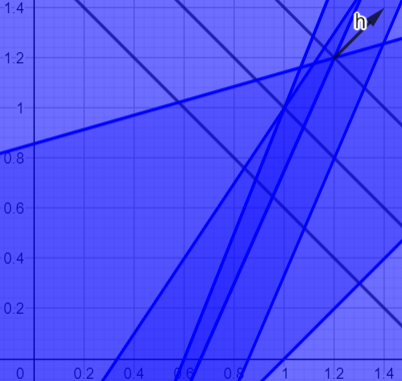

In [ ]:
# solve dual with B^{-1}^Tc_{BI}
y_sol = np.linalg.inv(A[:, basic_var]).T @ c[basic_var]
print(f"y*={y_sol}")

y*=[0.  0.  0.4 0.2 0.  0. ]


In [ ]:
# dual
A_T = np.array([[-3., 1., -2., 9., -5., 7., -1, 0, 1, 0],
                [2., -1., 7., -4., 2., -3., 0, -1, 0, 1]])

b_artificial = [0, 0, 0, 0, 0, 0, 0, 0, -1, -1.0]
# min <b.T, y> = -max<-b.T, y>
b = np.array([1, -1, -6, -6, 3, -6., 0, 0])

c = [1, 2.]

basic_var = [8, 9]
artificial_var = [8, 9]

tableau = build_tableau(A_T, c, b_artificial)
two_phases(tableau, b, basic_var, artificial_var);


x_B = [9, 10]
[[ 0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.]
 [-3.  1. -2.  9. -5.  7. -1.  0.  1.  0.  1.]
 [ 2. -1.  7. -4.  2. -3.  0. -1.  0.  1.  2.]]
Cost corrected
x_B = [9, 10]
[[-1.  0.  5.  5. -3.  4. -1. -1.  0.  0.  3.]
 [-3.  1. -2.  9. -5.  7. -1.  0.  1.  0.  1.]
 [ 2. -1.  7. -4.  2. -3.  0. -1.  0.  1.  2.]]
Start phase One
x_B = [9, 3]
[[-2.42857143  0.71428571  0.          7.85714286 -4.42857143  6.14285714 -1.         -0.28571429  0.         -0.71428571  1.57142857]
 [-2.42857143  0.71428571  0.          7.85714286 -4.42857143  6.14285714 -1.         -0.28571429  1.          0.28571429  1.57142857]
 [ 0.28571429 -0.14285714  1.         -0.57142857  0.28571429 -0.42857143  0.         -0.14285714  0.          0.14285714  0.28571429]]
x_B = [4, 3]
[[ 0.         -0.          0.          0.         -0.         -0.         -0.         -0.         -1.         -1.          0.        ]
 [-0.30909091  0.09090909  0.          1.         -0.56363636  0.78181818 -0.12727273 -0.0

In [ ]:
# solve primal with B^{-1}^Tc_{BI}
x_sol = np.linalg.inv(A_T[:, basic_var]).T @ b[basic_var]
print(f"x*={x_sol}")


x*=[-1.2 -1.2]
